<a href="https://colab.research.google.com/github/VVKMulukutla/FML/blob/main/KMeansClustering_05A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import sklearn.metrics as metrics 
from sklearn.datasets import load_breast_cancer
import sklearn.cluster as clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
can = load_breast_cancer()
can

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
can_df = pd.DataFrame(can['data'], columns = can['feature_names'])
can_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
scaler = MinMaxScaler()
can_df_req = can_df[['mean perimeter', 'mean smoothness']]
can_df_req_sca = scaler.fit_transform(can_df_req)

final_df = pd.DataFrame(can_df_req_sca, columns=['mean perimeter', 'mean smoothness'])
print(final_df)

     mean perimeter  mean smoothness
0          0.545989         0.593753
1          0.615783         0.289880
2          0.595743         0.514309
3          0.233501         0.811321
4          0.630986         0.430351
..              ...              ...
564        0.678668         0.526948
565        0.604036         0.407782
566        0.445788         0.288165
567        0.665538         0.588336
568        0.028540         0.000000

[569 rows x 2 columns]


In [51]:
km = KMeans(n_clusters = 3)
km_pred = km.fit_predict(final_df[['mean perimeter', 'mean smoothness']])
km_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1,

In [52]:
final_df['cluster_label'] = km.labels_
# final_df.drop('cluster_label', axis = 1)
final_df

,mean perimeter,mean smoothness,cluster_label
0,0.545989,0.593753,1
1,0.615783,0.289880,1
2,0.595743,0.514309,1
3,0.233501,0.811321,0
4,0.630986,0.430351,1
...,...,...,...
564,0.678668,0.526948,1
565,0.604036,0.407782,1
566,0.445788,0.288165,2
567,0.665538,0.588336,1


In [53]:
km.cluster_centers_

array([[0.25546489, 0.49973744],
       [0.57871444, 0.43639777],
       [0.25461568, 0.2879504 ]])

<Axes: xlabel='mean perimeter', ylabel='mean smoothness'>

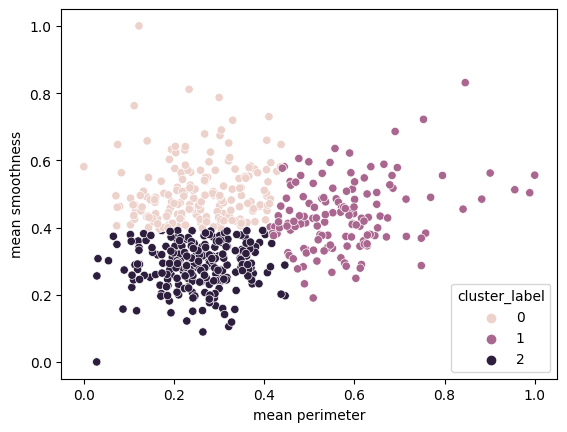

In [54]:
sns.scatterplot(x = 'mean perimeter', y = 'mean smoothness', data = final_df, hue = 'cluster_label')

In [49]:
range = range(2, 10)
check_arr = []

for i in range:
    kme = clusters.KMeans(n_clusters = i)
    kme = kme.fit(final_df[['mean perimeter', 'mean smoothness']])
    check_arr.append(kme.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

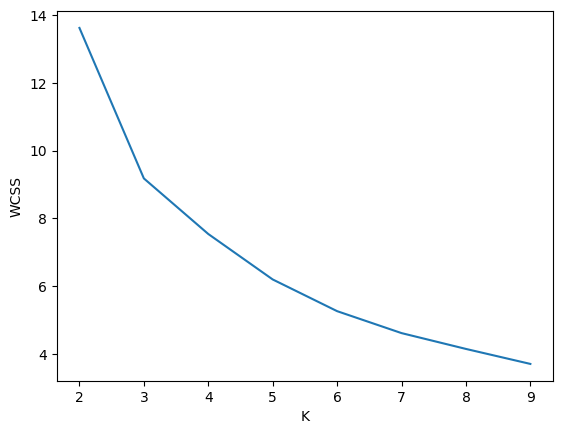

In [50]:
import matplotlib.pyplot as plt

plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(range, check_arr)